# 15. Homens e mulheres são igualmente suscetíveis a se curarem do vírus da COVID-19?

## Inicialização

In [39]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [40]:
df = pandas.read_csv('dados-es.csv', delimiter=';', encoding='latin1')
df = df[df['resultadoTeste']=='Positivo']

In [41]:

print("Tamanho antes: ", df.shape[0])

df_ = df.loc[df['evolucaoCaso'].isin(['Cura', 'Óbito'])]

print("Tamanho depois: ",df_.shape[0])

print("Perda: ", 1 - (df_.shape[0]/df.shape[0]))

Tamanho antes:  214213
Tamanho depois:  171877
Perda:  0.19763506416510668


---
Como iremos comparar a susceptibilidade à cura, retiramos os dados que não concluem se o paciente se curou ou se faleceu, pois dessa forma, podemos comparar com mais precisão as taxas de cura. Sendo assim, com essa limpeza nos dados infelizmente perdemos aproximadamente 20% das amostras, mas isso não é uma perda tão significativa, logo continuemos nossas análises.

In [42]:
df = df_

# Obtendo os dados separados por sexo
df_fem_all = df[df['sexo']=='Feminino']
df_masc_all = df[df['sexo']=='Masculino']
df_indef_all = df[df['sexo']=='Indefinido']
df_nan_all = df[df['sexo'].isnull()==True]
print('homens', len(df_masc_all))
print('mulheres', len(df_fem_all))
print('indefinidos', len(df_indef_all))
print('nan', len(df_nan_all))

homens 170168
mulheres 1680
indefinidos 1
nan 28


---
Aqui percebe-se que os pacientes do sexo feminino não são muito representativos, em outras palavras, tem pouquissimas mulheres no conjunto de dados, contabilizando apenas 0.9% da amostra. Portanto, ve-se que os nossos testes ficam prejudicados com isso, pois a amostra não representa bem a população.

In [43]:
# Contabilizando apenas os curados em um dataframe
df_masc_rec = df_masc_all[df_masc_all['evolucaoCaso']=='Cura']
df_fem_rec = df_fem_all[df_fem_all['evolucaoCaso']=='Cura']

---
## Analise descritiva

In [45]:
# Porcentagem de cura entre homens
print(100 * len(df_masc_rec)/len(df_masc_all), '%')

94.9203140425932 %


In [51]:
# Porcentagem de cura entre mulheres
print(100*len(df_fem_rec)/len(df_fem_all), '%')

95.23809523809524 %


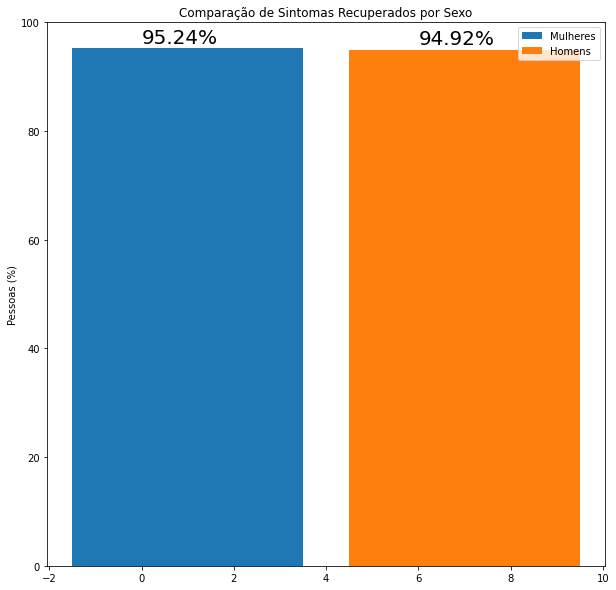

In [47]:
# plot do grafico das taxas de cura

fig, ax = plt.subplots()

fig.set_figwidth(10)
fig.set_figheight(10)

x = 1
width = 5

ax.bar(x, [100*len(df_fem_rec)/len(df_fem_all)], width, label='Mulheres')
ax.bar(x+width+1, [100*len(df_masc_rec)/len(df_masc_all)], width, label='Homens')

#ax.set_xticks(x, , )
ax.set_ylabel('Pessoas (%)')
ax.set_title('Comparação de Sintomas Recuperados por Sexo')

ax.legend()

for i,data in enumerate([100*len(df_fem_rec)/len(df_fem_all), 100*len(df_masc_rec)/len(df_masc_all)]):
    plt.text(x=i*(width+1 ), y =data+1 , s="{:.2f}%".format(data) , fontdict=dict(fontsize=20))

plt.show()

---
## Análise inferencial

A partir das analises anteriores percebe-se que as taxas de cura dentre os sexos são bem parecidas, então, para tentar comprovar isso usaremos um teste de hipótese para proporções entre duas populações. Dessas forma, será usado o teste Z, que é um teste que  usa o SVD para aproximar a distribuição das proporções para uma normal, e vale lembrar que como as amostras são significativamente grandes essa aproximação se torna eficaz. Sendo assim, consideremos:
-   H0-> as proporções são **iguais**
-   Ha -> as proporções são **diferentes**
-   nível de significância -> 5%

In [50]:
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import proportions_ztest

aux = proportions_ztest([len(df_masc_rec), len(df_fem_rec)], [len(df_masc_all), len(df_fem_all)])

print(aux)
print("\np-valor = ", aux[1])

(-0.5904420291921159, 0.5548943401170805)

p-valor =  0.5548943401170805


---
Então, obtemos um p-valor de 0.55 que é maior do que o valor significativo (0.05), portanto decidimos pela hipótese H0 - as proporções são **iguais**. 

## Conclusão

Existem algumas condições que afetam a recuperação do paciente com covid-19, como a portação de doenças crônicas. Mas aqui buscou-se analisar se o sexo também influência na taxa de cura dos pacientes.

Inicialmente percebemos que a amostra dos dados não é um bom reflexo da população, e isso pode prejudicar nossas análises. O motivo disso é que a quantidade de mulheres está muito baixa nesse conjunto de dados, chegando a apenas 0.9% da amostra, o que é um valor absurdo, pois de acordo com o IBGE as mulheres são aproximadamente 50.7% da população do país. 

Mesmo assim, seguimos nossa análise, porque o que vamos comparamos em si foi a proporção de cura, então essa falta de dados não afetou muito esse parâmetro. Em seguida, vimos que a taxa de cura de ambos os sexos é a mesma e está em torno de 95%. Portanto, respondendo a questão levantada no início, sim, homens e mulheres são igualmentes suscetíveis a se curarem do vírus da covid-19.